In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, BatchNormalization, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import concatenate as concat
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

drive_dir = '/content/drive/My Drive/'
data_dir = drive_dir + 'OCT/'
rnfl_dir = data_dir + 'RNFLT/'
scan_dir = data_dir + 'Bscan/'
pre_dir = data_dir + 'proc/'

data = pd.read_csv(data_dir + 'ReadMe/data_summary.csv')

imgs, labels, count = [], [], 0
for fn in sorted(os.listdir(pre_dir)):
  if count == 600:
    break
  print(fn)
  with np.load(pre_dir + fn) as img:
    img = img['bscans']

  for i in range(200):
    labels.append(data['glaucoma'][count])

  for im in img:
    imgs.append(im)

  count += 1

print(len(imgs), len(labels))
imgs = np.array(imgs)
labels = np.array(labels)

data_0001.npz
data_0002.npz
data_0003.npz
data_0004.npz
data_0005.npz
data_0006.npz
data_0007.npz
data_0008.npz
data_0009.npz
data_0010.npz
data_0011.npz
data_0012.npz
data_0013.npz
data_0014.npz
data_0015.npz
data_0016.npz
data_0017.npz
data_0018.npz
data_0019.npz
data_0020.npz
data_0021.npz
data_0022.npz
data_0023.npz
data_0024.npz
data_0025.npz
data_0026.npz
data_0027.npz
data_0028.npz
data_0029.npz
data_0030.npz
data_0031.npz
data_0032.npz
data_0033.npz
data_0034.npz
data_0035.npz
data_0036.npz
data_0037.npz
data_0038.npz
data_0039.npz
data_0040.npz
data_0041.npz
data_0042.npz
data_0043.npz
data_0044.npz
data_0045.npz
data_0046.npz
data_0047.npz
data_0048.npz
data_0049.npz
data_0050.npz
data_0051.npz
data_0052.npz
data_0053.npz
data_0054.npz
data_0055.npz
data_0056.npz
data_0057.npz
data_0058.npz
data_0059.npz
data_0060.npz
data_0061.npz
data_0062.npz
data_0063.npz
data_0064.npz
data_0065.npz
data_0066.npz
data_0067.npz
data_0068.npz
data_0069.npz
data_0070.npz
data_0071.npz
data_0

In [ ]:
import tensorflow.keras as keras

class UNET:
    def __init__(self, inp_shape=(200, 300, 1)):
        # parameters that were reused on every convolution
        C2D_params = {
            'kernel_size': (3, 3),
            'activation': 'relu',
            'kernel_initializer': 'he_normal',
            'padding': 'same'
        }

        trans_params = {
            'kernel_size': (2, 2),
            'strides': (2, 2),
            'padding': 'same'
        }

        # initialization
        inputs = tf.keras.layers.Input(inp_shape)

        # encoder
        c1 = Conv2D(16, **C2D_params)(inputs)
        c1 = Dropout(0.1)(c1)
        c1 = Conv2D(16, **C2D_params)(c1)
        p1 = MaxPooling2D((2, 2))(c1)

        c2 = Conv2D(32, **C2D_params)(p1)
        c2 = Dropout(0.1)(c2)
        c2 = Conv2D(32, **C2D_params)(c2)
        p2 = MaxPooling2D((2, 2))(c2)

        c3 = Conv2D(64, **C2D_params)(p2)
        c3 = Dropout(0.2)(c3)
        c3 = Conv2D(64, **C2D_params)(c3)
        p3 = MaxPooling2D((2, 2))(c3)

        c4 = Conv2D(128, **C2D_params)(p3)
        c4 = Dropout(0.2)(c4)
        c4 = Conv2D(128, **C2D_params)(c4)
        p4 = MaxPooling2D((2, 2))(c4)

        # valley
        c5 = Conv2D(256, **C2D_params)(p4)
        c5 = Dropout(0.3)(c5)
        c5 = Conv2D(256, **C2D_params)(c5)

        c4_crop = keras.layers.Cropping2D(cropping=((1,0), (1,0)))(c4)

        # decoder
        u6 = Conv2DTranspose(128, **trans_params)(c5)
        u6 = concat([u6, c4_crop])
        c6 = Conv2D(128, **C2D_params)(u6)
        c6 = Dropout(0.2)(c6)
        c6 = Conv2D(128, **C2D_params)(c6)

        c3_crop = keras.layers.Cropping2D(cropping=((2, 0), (3, 0)))(c3)

        u7 = Conv2DTranspose(64, **trans_params)(c6)
        u7 = concat([u7, c3_crop])
        c7 = Conv2D(64, **C2D_params)(u7)
        c7 = Dropout(0.2)(c7)
        c7 = Conv2D(64, **C2D_params)(c7)

        c2_crop = keras.layers.Cropping2D(cropping=((4, 0), (6, 0)))(c2)

        u8 = Conv2DTranspose(32, **trans_params)(c7)
        u8 = concat([u8, c2_crop])
        c8 = Conv2D(32, **C2D_params)(u8)
        c8 = Dropout(0.1)(c8)
        c8 = Conv2D(32, **C2D_params)(c8)

        c1_crop = keras.layers.Cropping2D(cropping=((8, 0), (12, 0)))(c1)

        u9 = Conv2DTranspose(16, **trans_params)(c8)
        u9 = concat([u9, c1_crop], axis=3)
        c9 = Conv2D(16, **C2D_params)(u9)
        c9 = Dropout(0.1)(c9)
        c9 = Conv2D(16, **C2D_params)(c9)

        # unet output
        gap = GlobalAveragePooling2D()(c9)
        final = Dense(1, activation='sigmoid')(gap)

        # compile our unet
        unet = tf.keras.Model(inputs=[inputs], outputs=[final])
        unet.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=
             [
                'accuracy',
                tf.keras.metrics.AUC(),
                tf.keras.metrics.Recall(),
                tf.keras.metrics.Precision()
             ]
        )

        self.model = unet

In [ ]:
unet = UNET()
unet.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 300, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 200, 300, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 200, 300, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 200, 300, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
from sklearn.model_selection import train_test_split

filepath = "/content/drive/MyDrive/OCT/models/u_netbase/glauc-epoch-{epoch:02d}.hdf5"

cb = [
    ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='max', save_freq='epoch')
]

X_train, X_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(96000, 200, 300) (96000,)
(24000, 200, 300) (24000,)


In [ ]:
unet.model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val), callbacks=[cb])

Epoch 1/50
3000/3000 [==============================] - ETA: 0s - loss: 0.6445 - accuracy: 0.6362 - auc: 0.6767 - recall: 0.4366 - precision: 0.6227
Epoch 1: saving model to /content/drive/MyDrive/OCT/models/u_netbase/glauc-epoch-01.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3000/3000 [==============================] - 483s 152ms/step - loss: 0.6445 - accuracy: 0.6362 - auc: 0.6767 - recall: 0.4366 - precision: 0.6227 - val_loss: 0.5953 - val_accuracy: 0.6937 - val_auc: 0.7882 - val_recall: 0.3629 - val_precision: 0.8678
Epoch 2/50
3000/3000 [==============================] - ETA: 0s - loss: 0.5153 - accuracy: 0.7440 - auc: 0.8146 - recall: 0.6508 - precision: 0.7360
Epoch 2: saving model to /content/drive/MyDrive/OCT/models/u_netbase/glauc-epoch-02.hdf5
3000/3000 [==============================] - 444s 148ms/step - loss: 0.5153 - accuracy: 0.7440 - auc: 0.8146 - recall: 0.6508 - precision: 0.7360 - val_loss: 0.4727 - val_accuracy: 0.7699 - val_auc: 0.8451 - val_recall: 0.6116 - val_precision: 0.8229
Epoch 3/50
3000/3000 [==============================] - ETA: 0s - loss: 0.4617 - accuracy: 0.7779 - auc: 0.8534 - recall: 0.6813 - precision: 0.7848
Epoch 3: saving model to /content/drive/MyDrive/OCT/models/u_netbase/glauc-epoch-03.hdf5
3000/3000 [===========

In [ ]:
unet.model.history.history
keys = list(unet.model.history.history.keys())
keys

['loss',
 'accuracy',
 'auc',
 'recall',
 'precision',
 'val_loss',
 'val_accuracy',
 'val_auc',
 'val_recall',
 'val_precision']

In [ ]:
train_loss = unet.model.history.history[keys[0]]
print(keys[0])

val_loss = unet.model.history.history[keys[5]]
print(keys[5])

train_accuracy = unet.model.history.history[keys[1]]
print(keys[1])

val_accuracy = unet.model.history.history[keys[6]]
print(keys[6])

train_auc = unet.model.history.history[keys[2]]
print(keys[2])

val_auc = unet.model.history.history[keys[7]]
print(keys[7])

train_precision = unet.model.history.history[keys[3]]
print(keys[3])

val_precision = unet.model.history.history[keys[8]]
print(keys[8])

train_recall = unet.model.history.history[keys[4]]
print(keys[4])

val_recall = unet.model.history.history[keys[9]]
print(keys[9])

epochs = range(1, len(train_loss) + 1)

loss
val_loss
accuracy
val_accuracy
auc
val_auc
recall
val_recall
precision
val_precision


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/OCT/models/u_netbase/results/loss.png'

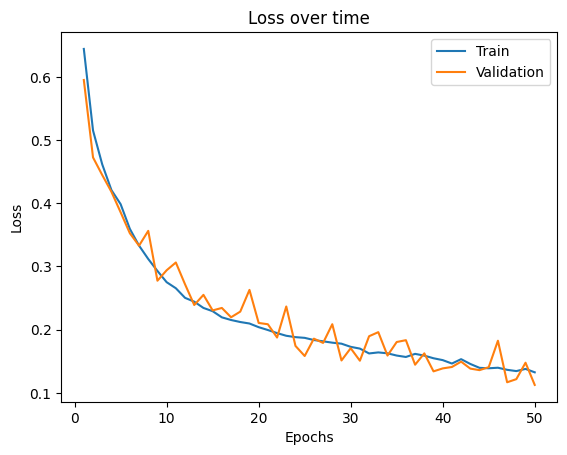

In [ ]:
import matplotlib.pyplot as plt

results_dir = '/content/drive/MyDrive/OCT/models/u_netbase/results/'

plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, val_loss, label='Validation')
plt.title('Loss over time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(results_dir + 'loss.png')
plt.show()

plt.plot(epochs, train_accuracy, label='Train')
plt.plot(epochs, val_accuracy, label='Validation')
plt.title('Accuracy over time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(results_dir + 'accuracy.png')
plt.ylim(0, 1)
plt.show()

plt.plot(epochs, train_auc, label='Traini')
plt.plot(epochs, val_auc, label='Validation')
plt.title('AUC over time')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.savefig(results_dir + 'auc.png')
plt.ylim(0, 1)
plt.show()

plt.plot(epochs, train_precision, label='Train')
plt.plot(epochs, val_precision, label='Validation')
plt.title('Precision over time')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.savefig(results_dir + 'precision.png')
plt.ylim(0, 1)
plt.show()

plt.plot(epochs, train_recall, label='Train')
plt.plot(epochs, val_recall, label='Validation')
plt.title('Recall over time')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.savefig(results_dir + 'recall.png')
plt.ylim(0, 1)
plt.show()